In [1]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
import random

from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/MyDrive/python_lab")
os.getcwd()

In [43]:
lr = 0.001
batch_size = 10
epochs = 10

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)

print(device)

cuda


Task 1-2

In [4]:
df = pd.read_csv('annotation_random.csv', delimiter='\t', usecols=(1, 2), names=('Path', 'Name'))

Task 4

Class dataset,which will store uploaded and converted images and class labels: 0-cat, 1-dog

In [5]:

class dataset(torch.utils.data.Dataset):
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform


    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list["Path"])
        return self.filelength

    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list.iloc[idx]["Path"].replace("\\", "/")
        img = Image.open(img_path)
        img_transformed = self.transform(img)

        label = self.file_list.iloc[idx]["Name"]
        if label == 'dog':
            label=1
        elif label == 'cat':
            label=0

        return img_transformed,label

In [6]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    ])

In [18]:
train_data = dataset(df.iloc[0:1600], transform=train_transforms)
test_data = dataset(df.iloc[1600:1800], transform=test_transforms)
val_data = dataset(df.iloc[1800:2000], transform=val_transforms)

Task 3

Convolutional neural network

In [8]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )

        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )


        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()


    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

Tasks 5-6

Model training

Learning rate: 0.001, Batch size: 10
Epoch : 1, train accuracy : 0.5825002789497375, train loss : 0.6788713932037354
Epoch : 1, val_accuracy : 0.6100000143051147, val_loss : 0.661485493183136
Epoch : 2, train accuracy : 0.6331250667572021, train loss : 0.6474052667617798
Epoch : 2, val_accuracy : 0.5700000524520874, val_loss : 0.6707715392112732
Epoch : 3, train accuracy : 0.6437501907348633, train loss : 0.637794554233551
Epoch : 3, val_accuracy : 0.6549999713897705, val_loss : 0.6359232068061829
Epoch : 4, train accuracy : 0.6725001931190491, train loss : 0.6174351572990417
Epoch : 4, val_accuracy : 0.720000147819519, val_loss : 0.5754987001419067
Epoch : 5, train accuracy : 0.6806251406669617, train loss : 0.5904818773269653
Epoch : 5, val_accuracy : 0.7000001072883606, val_loss : 0.5580543279647827
Epoch : 6, train accuracy : 0.6893751621246338, train loss : 0.5752578377723694
Epoch : 6, val_accuracy : 0.755000114440918, val_loss : 0.5249887108802795
Epoch : 7, train accuracy : 0.6

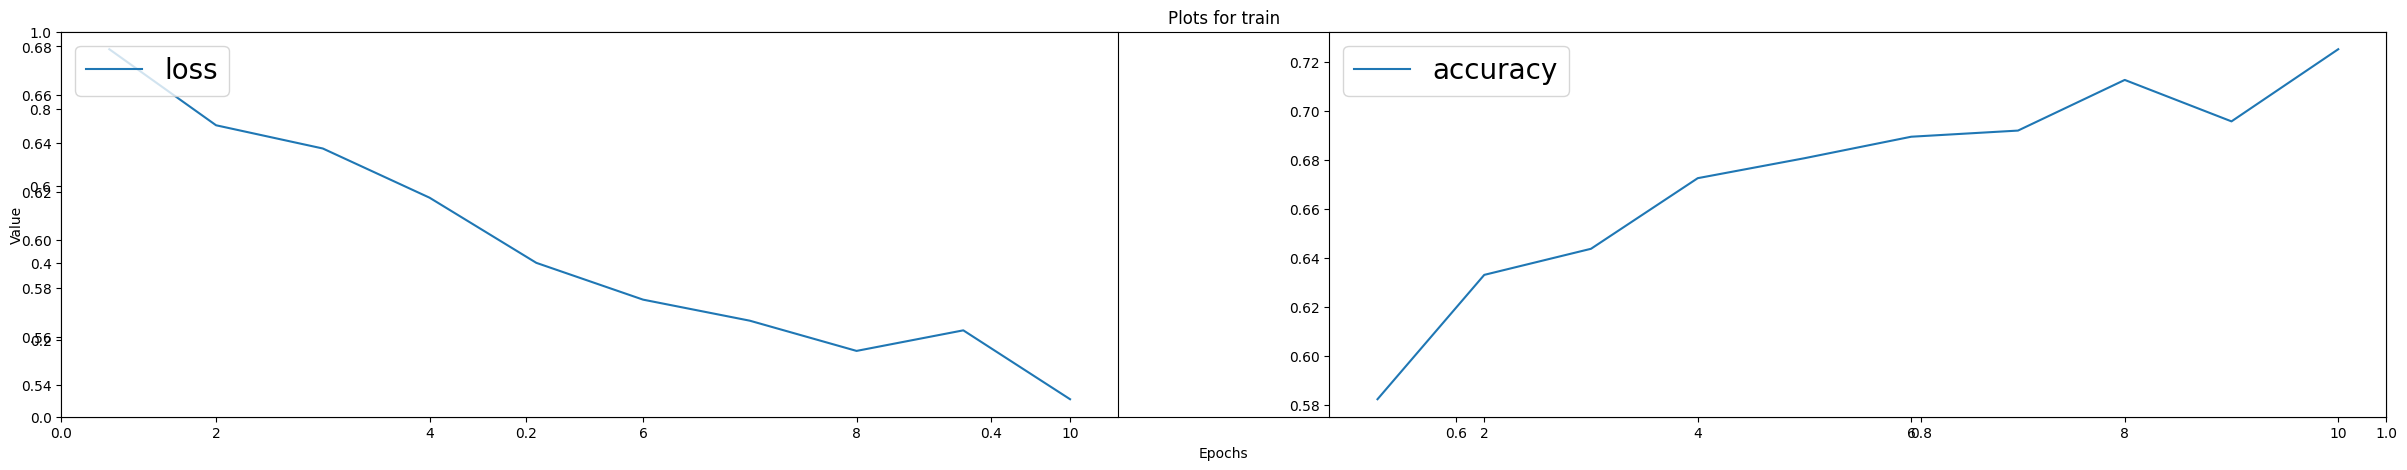

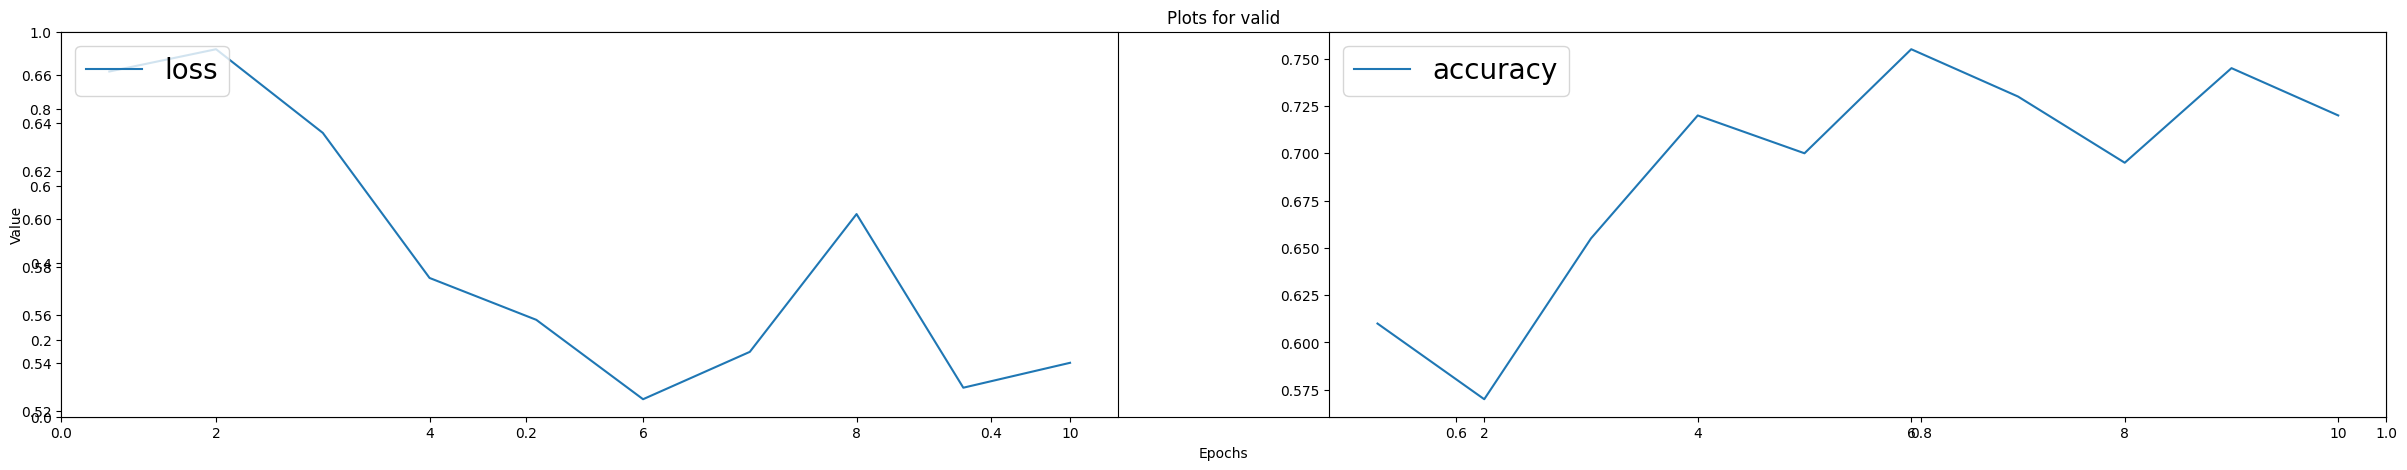



Learning rate: 0.0001, Batch size: 10
Epoch : 1, train accuracy : 0.5600001811981201, train loss : 0.6856874227523804
Epoch : 1, val_accuracy : 0.5450000166893005, val_loss : 0.6863042712211609
Epoch : 2, train accuracy : 0.609375, train loss : 0.6546717882156372
Epoch : 2, val_accuracy : 0.6150000095367432, val_loss : 0.6577896475791931
Epoch : 3, train accuracy : 0.641875147819519, train loss : 0.6373830437660217
Epoch : 3, val_accuracy : 0.6150000095367432, val_loss : 0.6434661149978638
Epoch : 4, train accuracy : 0.661875307559967, train loss : 0.6269270777702332
Epoch : 4, val_accuracy : 0.6950001120567322, val_loss : 0.6187082529067993
Epoch : 5, train accuracy : 0.684374988079071, train loss : 0.6143133044242859
Epoch : 5, val_accuracy : 0.6650001406669617, val_loss : 0.6450296640396118
Epoch : 6, train accuracy : 0.6818752288818359, train loss : 0.6010909676551819
Epoch : 6, val_accuracy : 0.6449999213218689, val_loss : 0.6266187429428101
Epoch : 7, train accuracy : 0.6856251

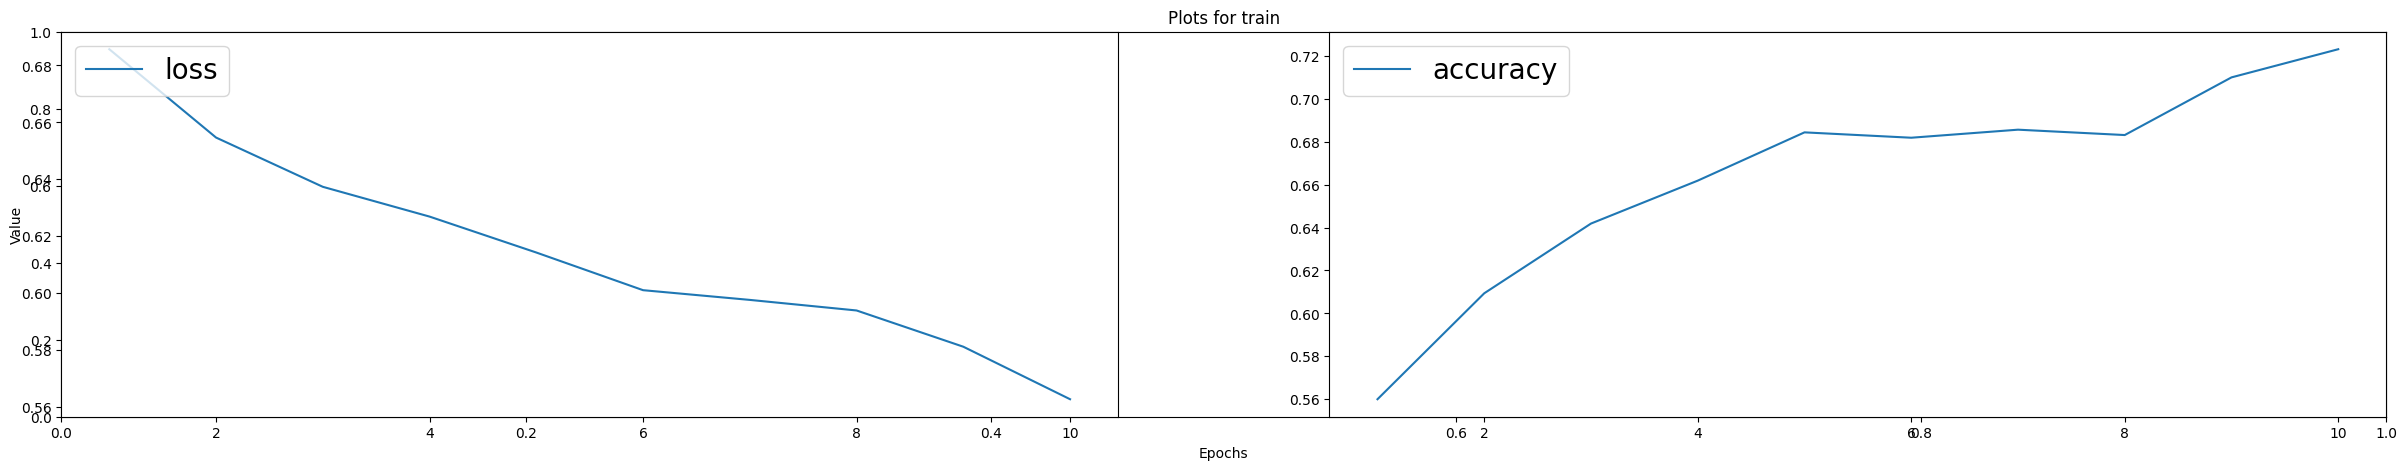

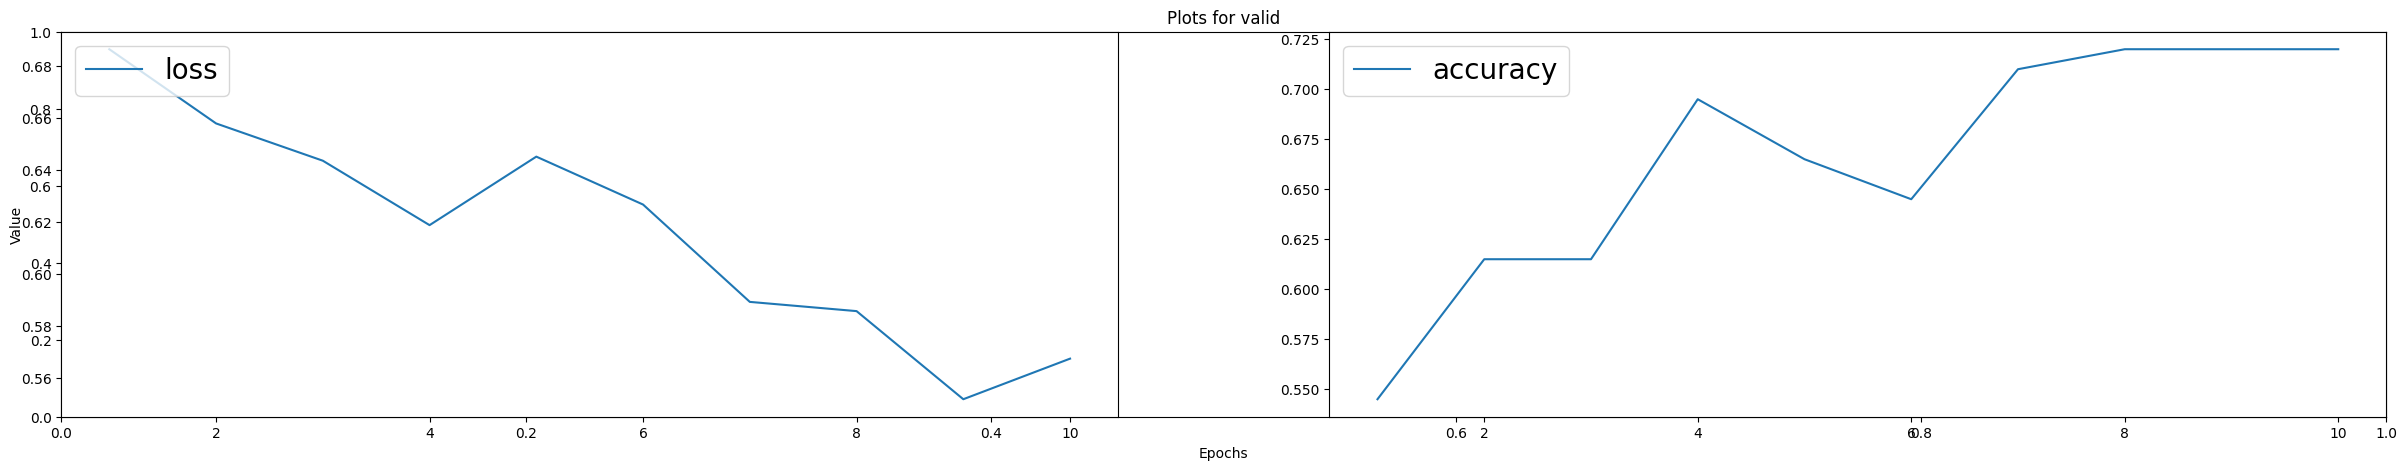



Learning rate: 1e-05, Batch size: 10
Epoch : 1, train accuracy : 0.5000001788139343, train loss : 0.7248075008392334
Epoch : 1, val_accuracy : 0.4950000047683716, val_loss : 0.696647047996521
Epoch : 2, train accuracy : 0.5356252789497375, train loss : 0.6925114989280701
Epoch : 2, val_accuracy : 0.565000057220459, val_loss : 0.6873645782470703
Epoch : 3, train accuracy : 0.537500262260437, train loss : 0.6873824596405029
Epoch : 3, val_accuracy : 0.5149999856948853, val_loss : 0.6956666707992554
Epoch : 4, train accuracy : 0.5468753576278687, train loss : 0.6850151419639587
Epoch : 4, val_accuracy : 0.49000000953674316, val_loss : 0.6987386345863342
Epoch : 5, train accuracy : 0.5712503790855408, train loss : 0.6788280606269836
Epoch : 5, val_accuracy : 0.5900000333786011, val_loss : 0.6781597137451172
Epoch : 6, train accuracy : 0.5825002193450928, train loss : 0.6731651425361633
Epoch : 6, val_accuracy : 0.6299999952316284, val_loss : 0.6796327233314514
Epoch : 7, train accuracy :

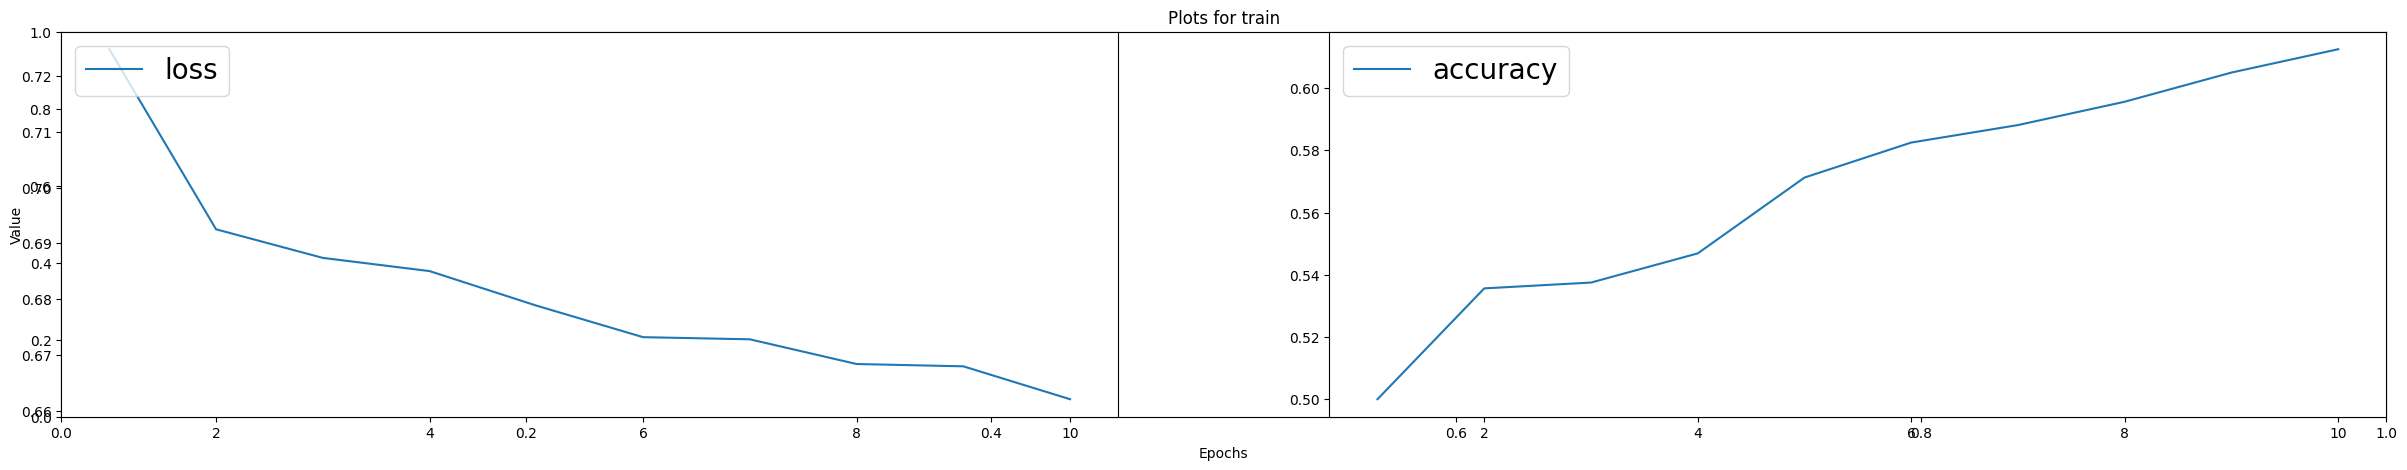

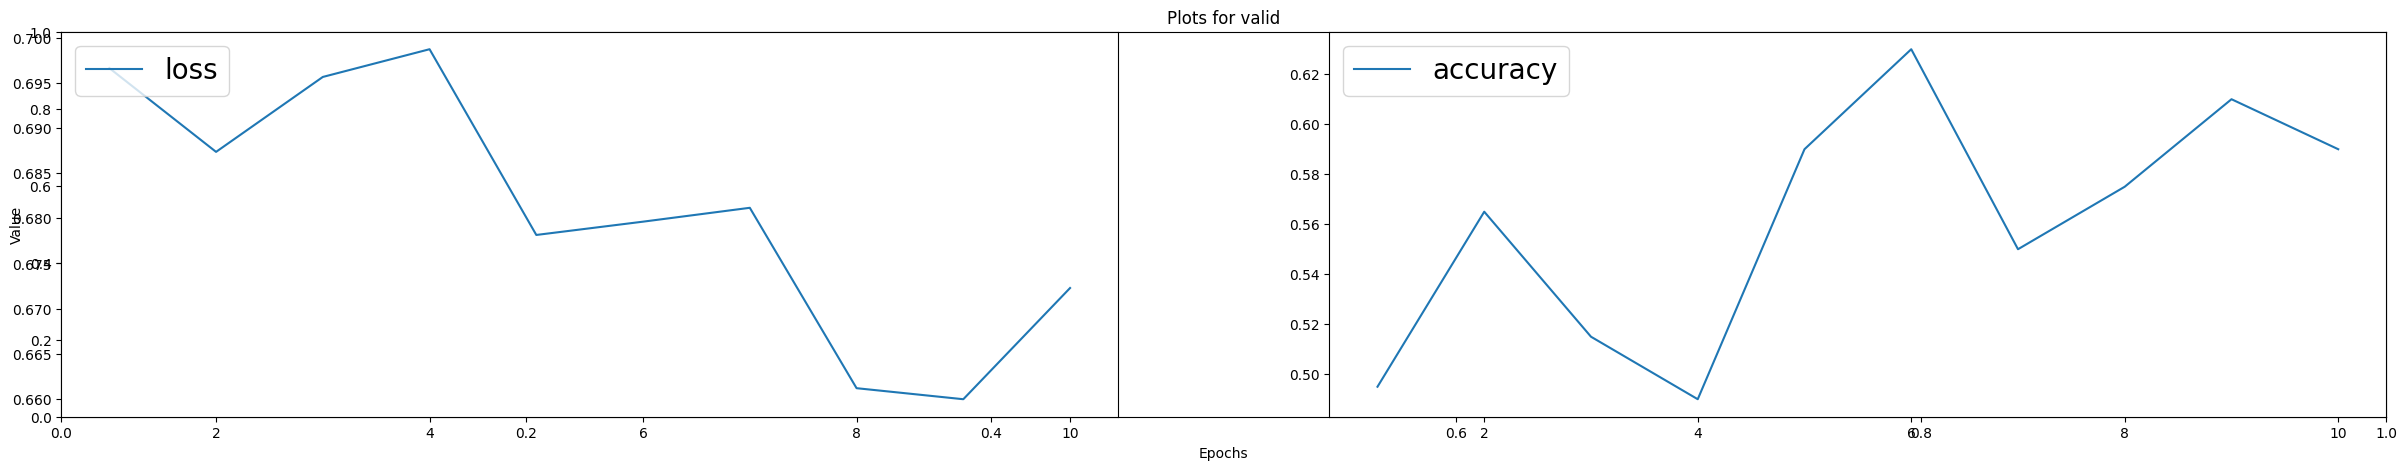



Learning rate: 0.001, Batch size: 25
Epoch : 1, train accuracy : 0.5774999260902405, train loss : 0.6742910742759705
Epoch : 1, val_accuracy : 0.6349999904632568, val_loss : 0.6448094248771667
Epoch : 2, train accuracy : 0.6512499451637268, train loss : 0.632538378238678
Epoch : 2, val_accuracy : 0.6699999570846558, val_loss : 0.6181825995445251
Epoch : 3, train accuracy : 0.6775000095367432, train loss : 0.6109212040901184
Epoch : 3, val_accuracy : 0.675000011920929, val_loss : 0.6022990942001343
Epoch : 4, train accuracy : 0.6874998807907104, train loss : 0.5982832312583923
Epoch : 4, val_accuracy : 0.7449999451637268, val_loss : 0.5651407837867737
Epoch : 5, train accuracy : 0.7056248784065247, train loss : 0.5804510116577148
Epoch : 5, val_accuracy : 0.7250000238418579, val_loss : 0.5602332353591919
Epoch : 6, train accuracy : 0.7099999189376831, train loss : 0.5713699460029602
Epoch : 6, val_accuracy : 0.7399999499320984, val_loss : 0.5413630604743958
Epoch : 7, train accuracy :

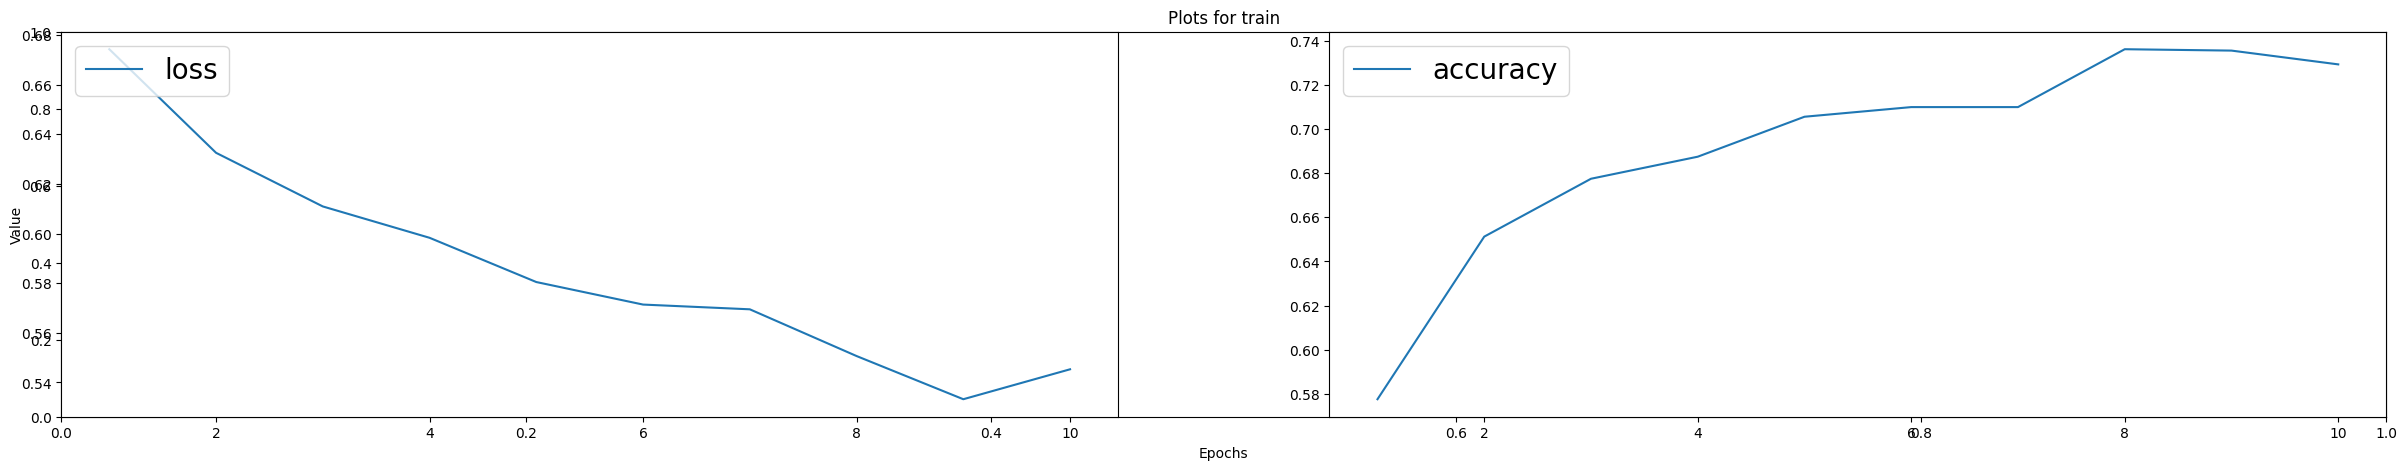

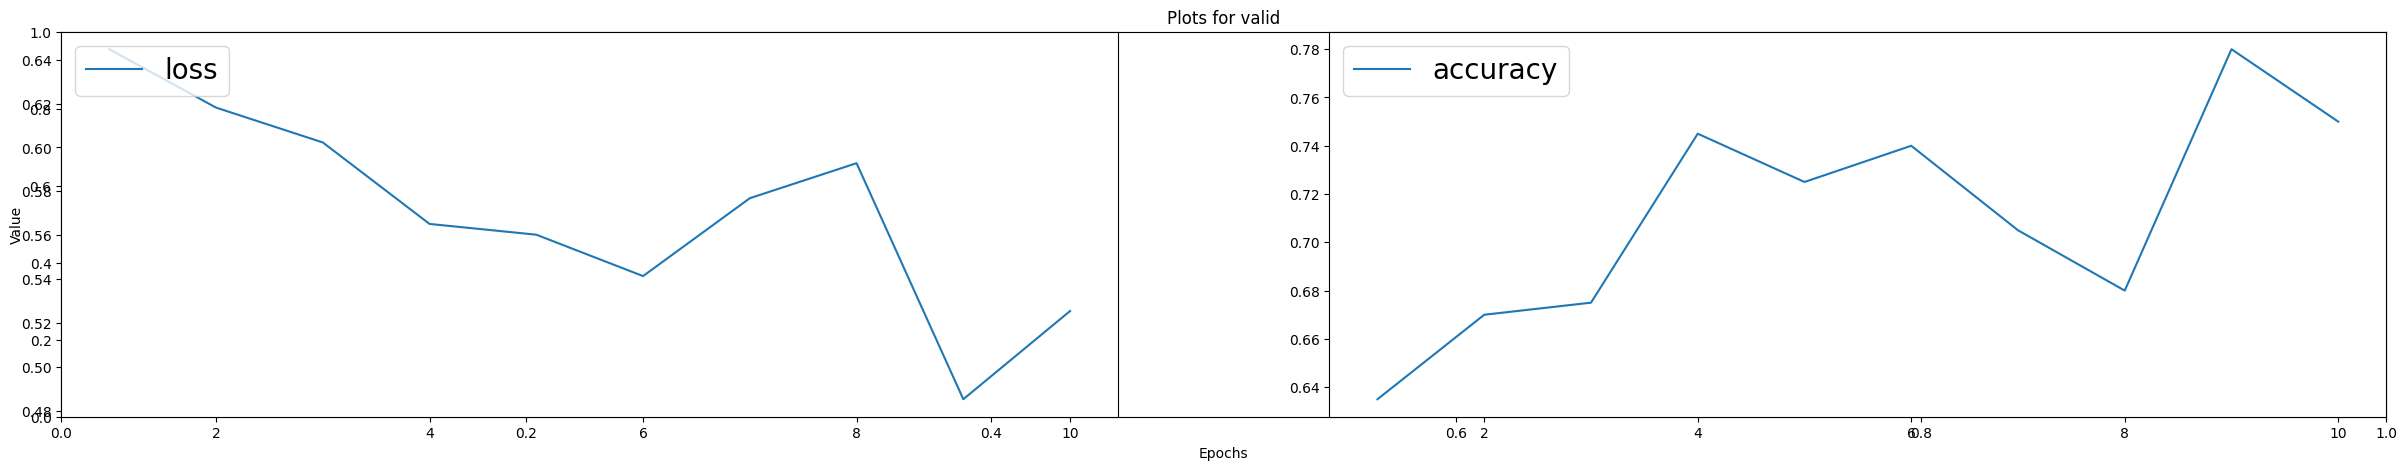



Learning rate: 0.0001, Batch size: 25
Epoch : 1, train accuracy : 0.5393750071525574, train loss : 0.6878767013549805
Epoch : 1, val_accuracy : 0.6149999499320984, val_loss : 0.664822518825531
Epoch : 2, train accuracy : 0.6156249642372131, train loss : 0.6568552851676941
Epoch : 2, val_accuracy : 0.6049999594688416, val_loss : 0.6564791798591614
Epoch : 3, train accuracy : 0.6293749809265137, train loss : 0.6441623568534851
Epoch : 3, val_accuracy : 0.6649999618530273, val_loss : 0.6341940760612488
Epoch : 4, train accuracy : 0.6431249976158142, train loss : 0.6299919486045837
Epoch : 4, val_accuracy : 0.625, val_loss : 0.6474982500076294
Epoch : 5, train accuracy : 0.6418749094009399, train loss : 0.6226422786712646
Epoch : 5, val_accuracy : 0.6399999856948853, val_loss : 0.6413549780845642
Epoch : 6, train accuracy : 0.6524999737739563, train loss : 0.6165657043457031
Epoch : 6, val_accuracy : 0.6549999713897705, val_loss : 0.6257238984107971
Epoch : 7, train accuracy : 0.69437485

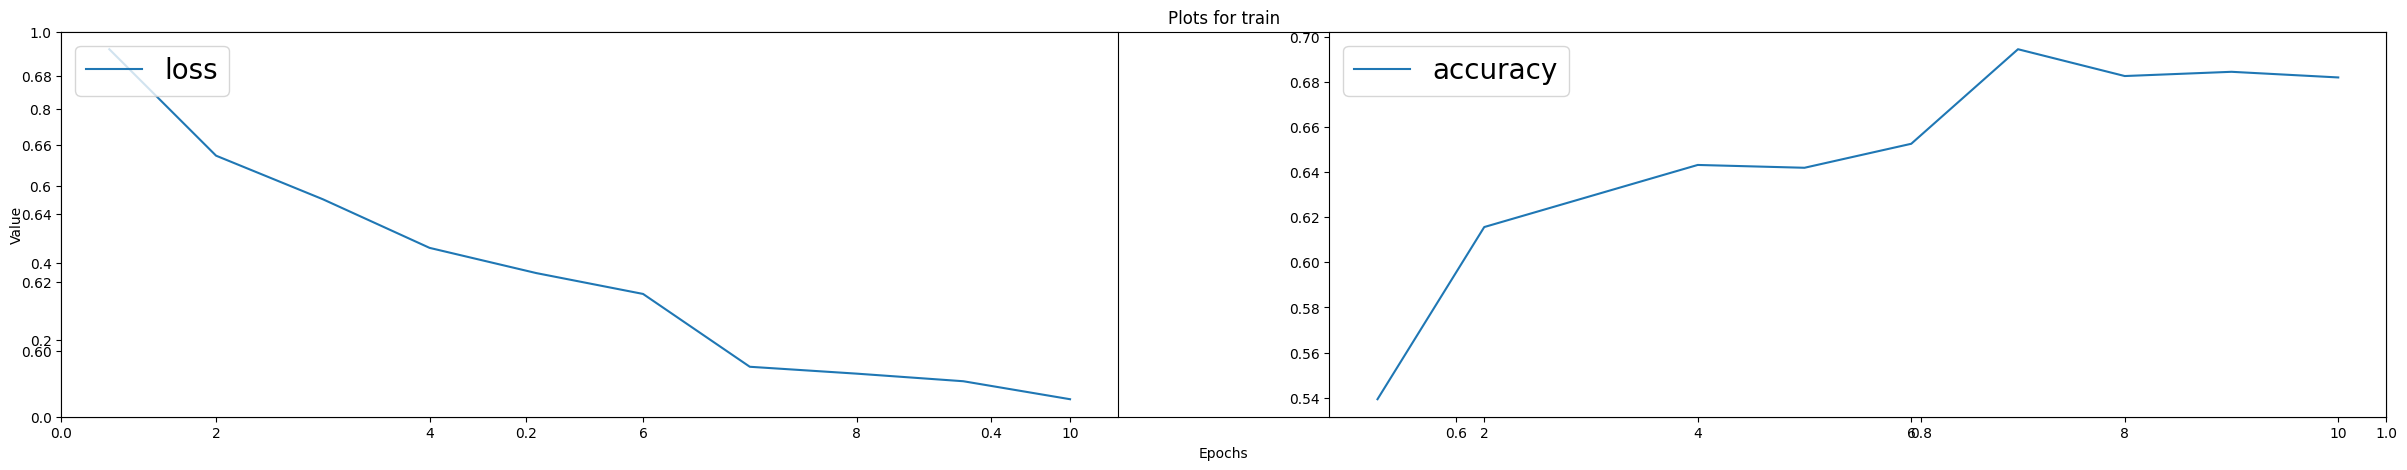

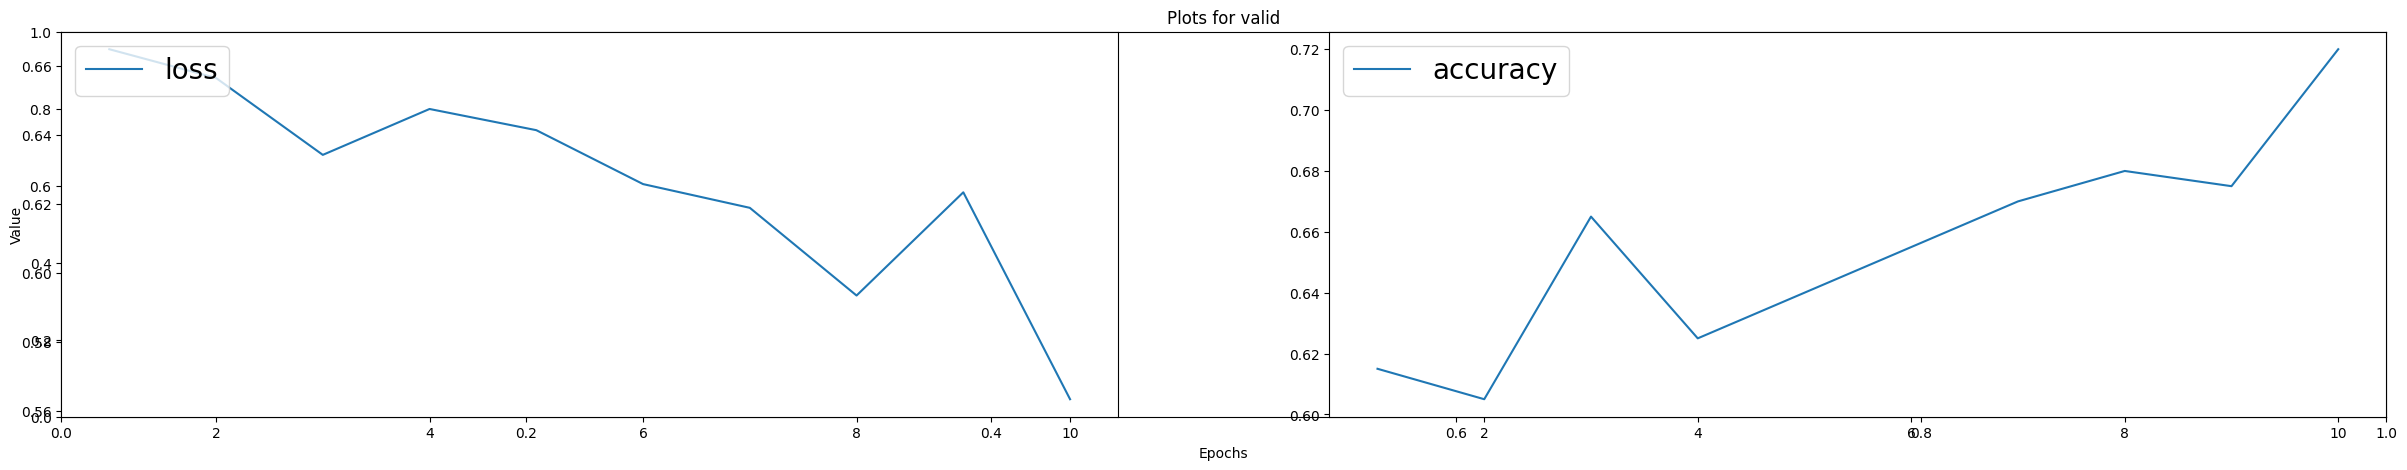



Learning rate: 1e-05, Batch size: 25
Epoch : 1, train accuracy : 0.5368750095367432, train loss : 0.6983494758605957
Epoch : 1, val_accuracy : 0.5499999523162842, val_loss : 0.6973677277565002
Epoch : 2, train accuracy : 0.5606249570846558, train loss : 0.6843701004981995
Epoch : 2, val_accuracy : 0.5600000023841858, val_loss : 0.6736836433410645
Epoch : 3, train accuracy : 0.5606250166893005, train loss : 0.6838869452476501
Epoch : 3, val_accuracy : 0.5799999833106995, val_loss : 0.6721122860908508
Epoch : 4, train accuracy : 0.5643750429153442, train loss : 0.6805362105369568
Epoch : 4, val_accuracy : 0.574999988079071, val_loss : 0.6758367419242859
Epoch : 5, train accuracy : 0.5881250500679016, train loss : 0.6737099289894104
Epoch : 5, val_accuracy : 0.5799999833106995, val_loss : 0.6770707964897156
Epoch : 6, train accuracy : 0.581250011920929, train loss : 0.6730005145072937
Epoch : 6, val_accuracy : 0.5899999737739563, val_loss : 0.6684209108352661
Epoch : 7, train accuracy :

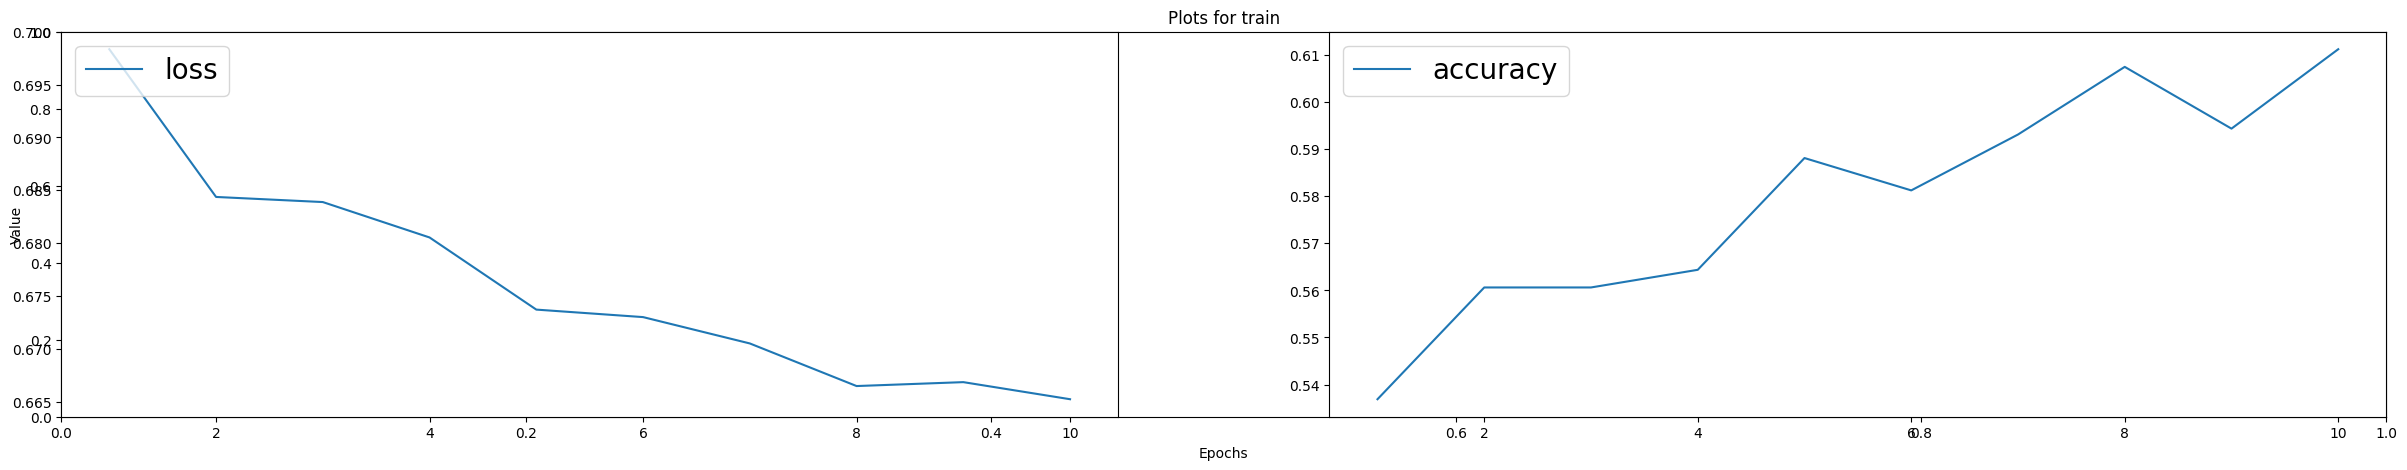

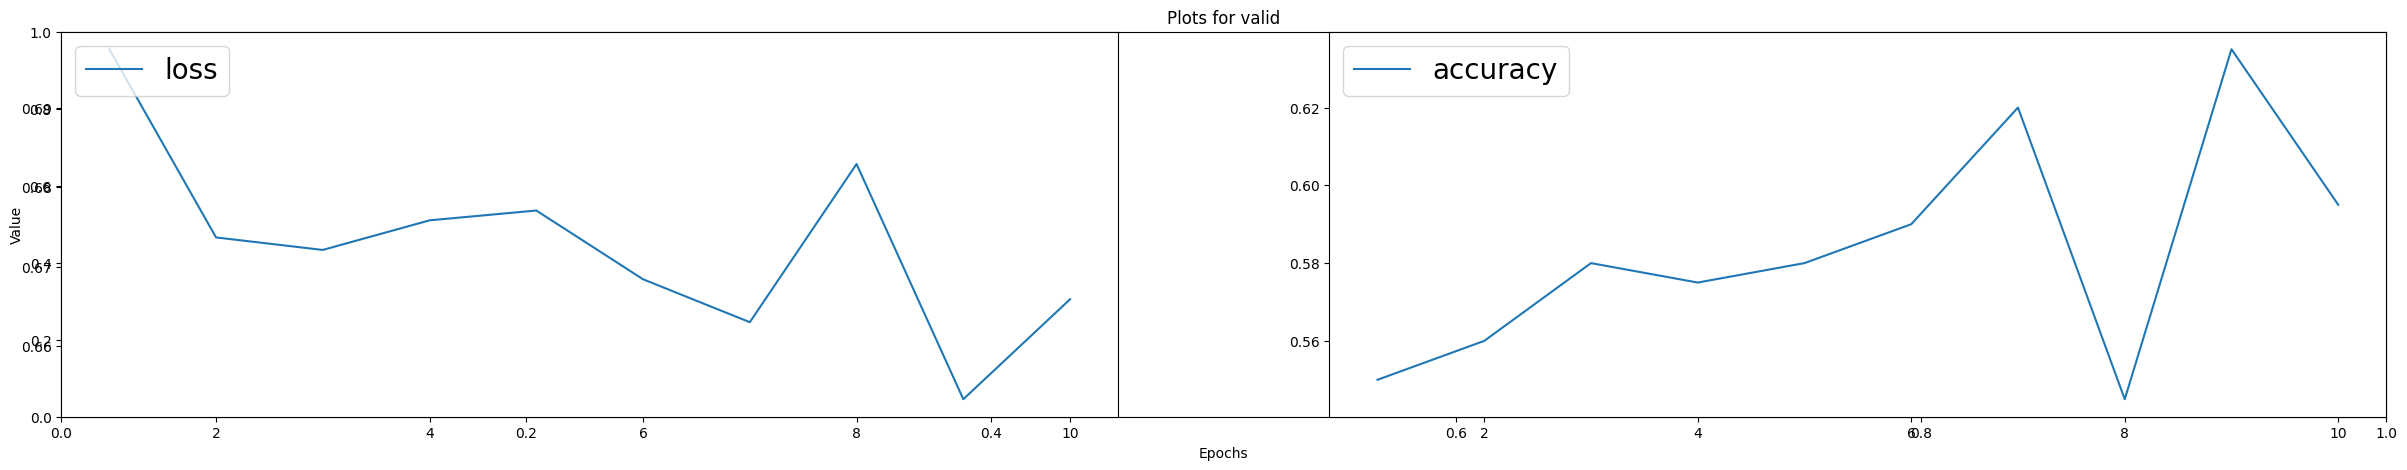



Learning rate: 0.001, Batch size: 50
Epoch : 1, train accuracy : 0.5993749499320984, train loss : 0.6660260558128357
Epoch : 1, val_accuracy : 0.6049999594688416, val_loss : 0.6626286506652832
Epoch : 2, train accuracy : 0.6575000286102295, train loss : 0.6212315559387207
Epoch : 2, val_accuracy : 0.6349999308586121, val_loss : 0.6113100647926331
Epoch : 3, train accuracy : 0.6656250953674316, train loss : 0.6104292273521423
Epoch : 3, val_accuracy : 0.7249999642372131, val_loss : 0.5829051733016968
Epoch : 4, train accuracy : 0.6781250238418579, train loss : 0.5939512252807617
Epoch : 4, val_accuracy : 0.6549999713897705, val_loss : 0.6291166543960571
Epoch : 5, train accuracy : 0.7000000476837158, train loss : 0.5723850131034851
Epoch : 5, val_accuracy : 0.7049999833106995, val_loss : 0.5617096424102783
Epoch : 6, train accuracy : 0.6981250047683716, train loss : 0.5623819231987
Epoch : 6, val_accuracy : 0.7300000190734863, val_loss : 0.5311473608016968
Epoch : 7, train accuracy : 

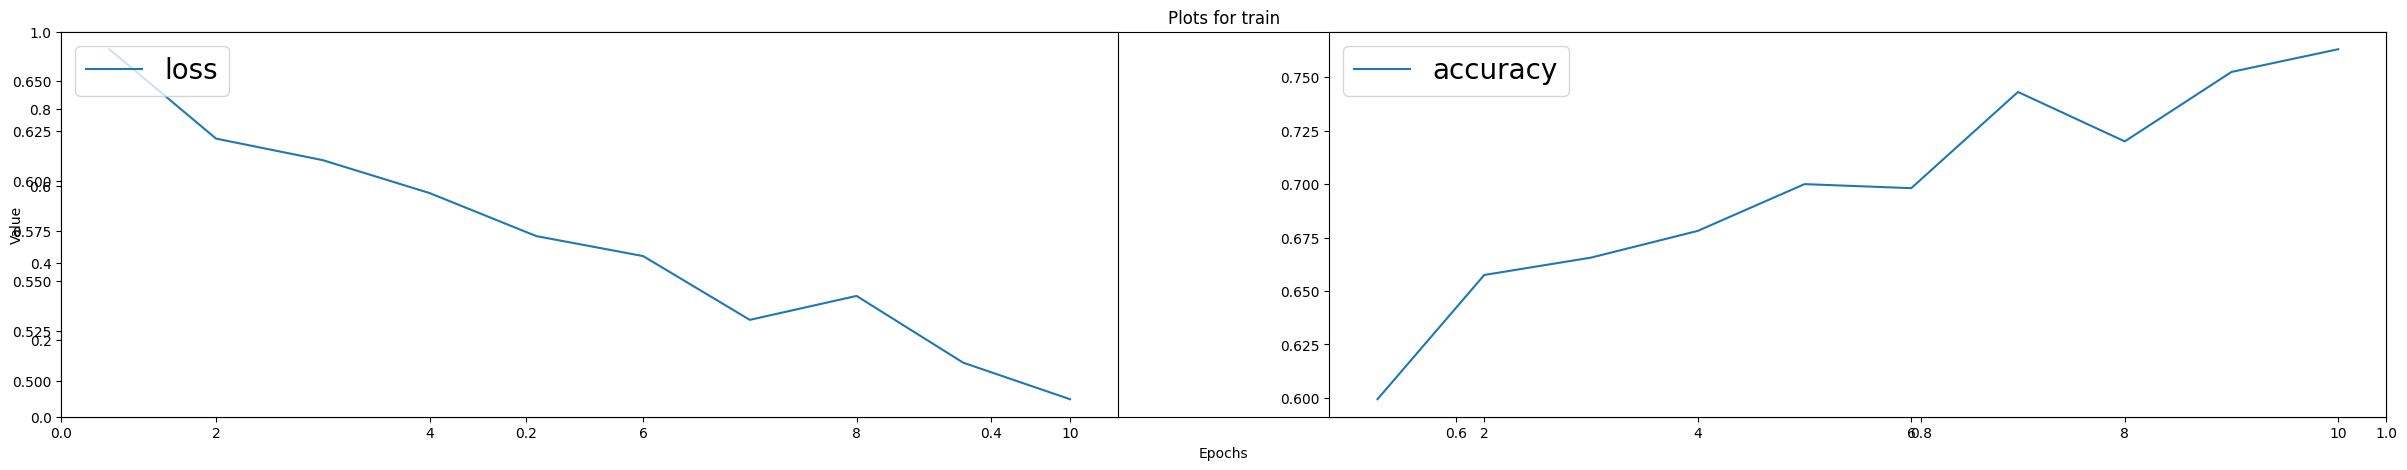

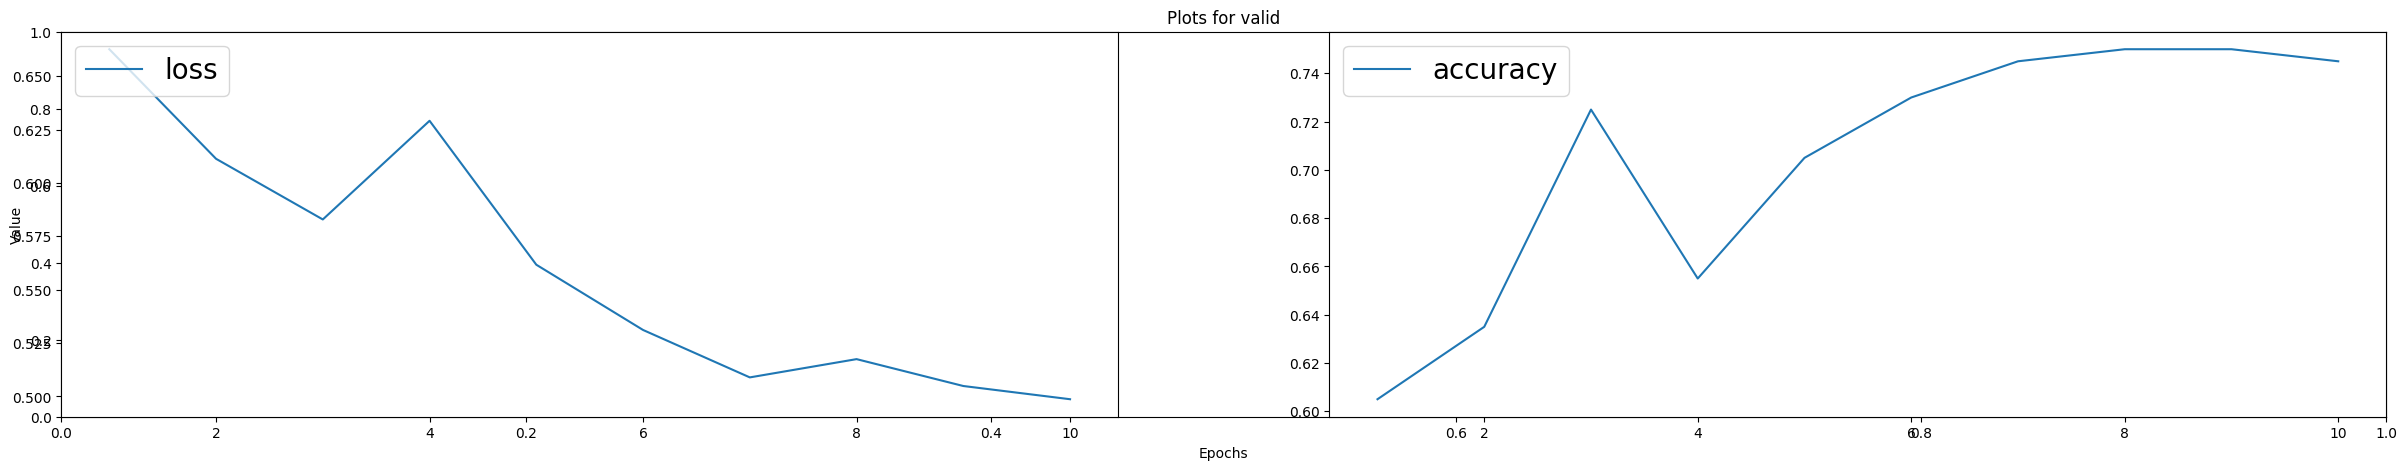



Learning rate: 0.0001, Batch size: 50
Epoch : 1, train accuracy : 0.5293750166893005, train loss : 0.6892911195755005
Epoch : 1, val_accuracy : 0.5349999666213989, val_loss : 0.6950598359107971
Epoch : 2, train accuracy : 0.5893750190734863, train loss : 0.674135684967041
Epoch : 2, val_accuracy : 0.574999988079071, val_loss : 0.6773518323898315
Epoch : 3, train accuracy : 0.612500011920929, train loss : 0.6619638800621033
Epoch : 3, val_accuracy : 0.5699999928474426, val_loss : 0.6749595403671265
Epoch : 4, train accuracy : 0.606249988079071, train loss : 0.657538890838623
Epoch : 4, val_accuracy : 0.6299999952316284, val_loss : 0.6569098234176636
Epoch : 5, train accuracy : 0.6481249332427979, train loss : 0.6413940787315369
Epoch : 5, val_accuracy : 0.5849999785423279, val_loss : 0.6457325220108032
Epoch : 6, train accuracy : 0.6500000357627869, train loss : 0.6361756920814514
Epoch : 6, val_accuracy : 0.625, val_loss : 0.6320851445198059
Epoch : 7, train accuracy : 0.652499973773

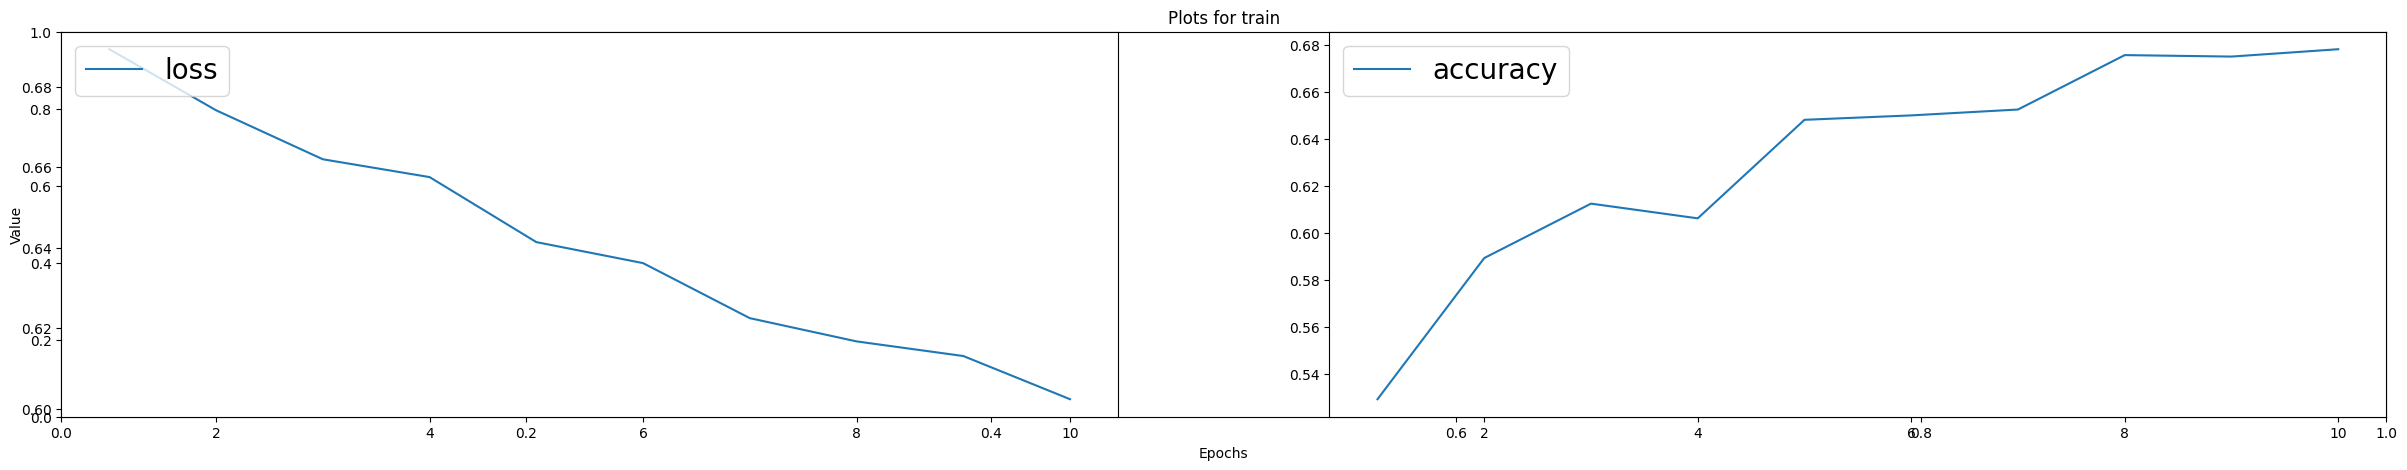

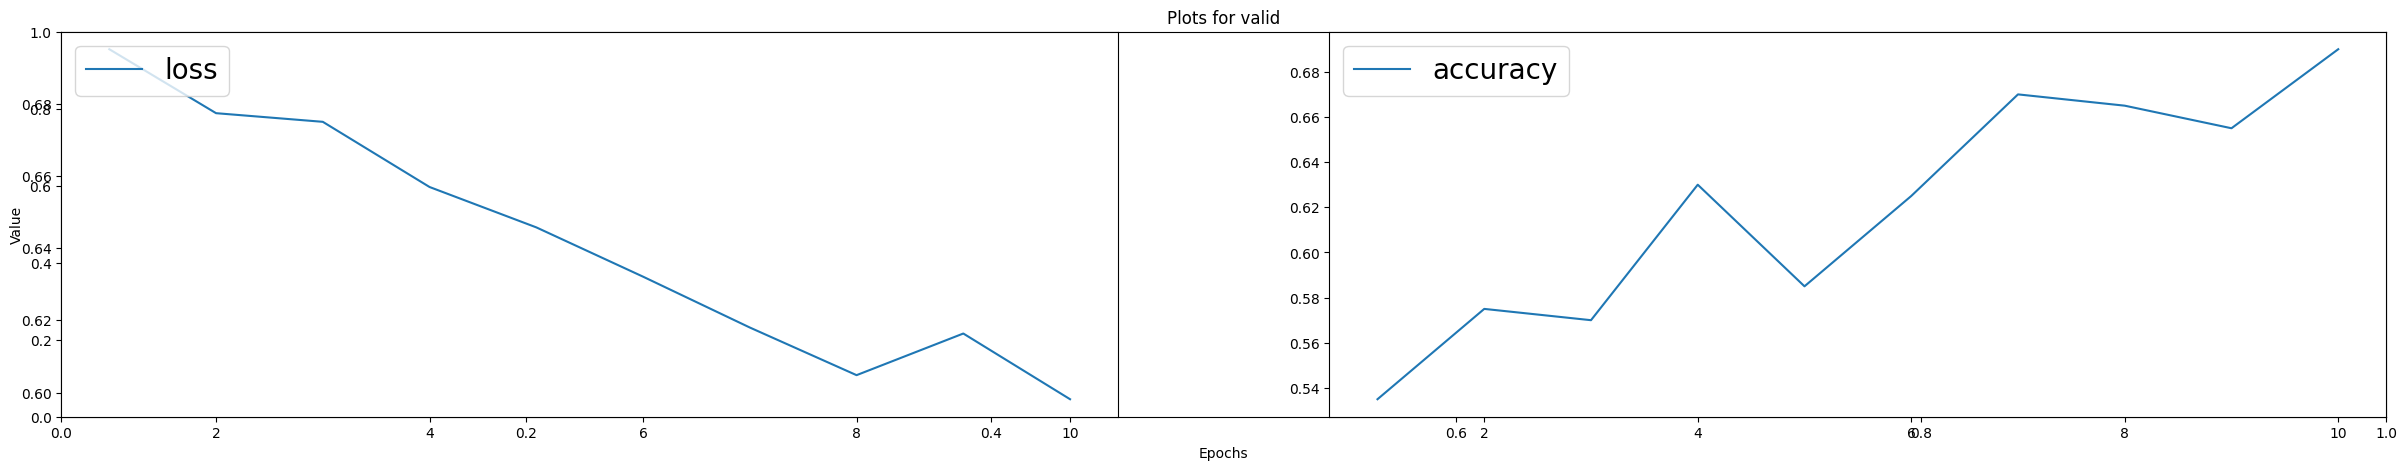



Learning rate: 1e-05, Batch size: 50
Epoch : 1, train accuracy : 0.5043749809265137, train loss : 0.705970048904419
Epoch : 1, val_accuracy : 0.5149999856948853, val_loss : 0.6979707479476929
Epoch : 2, train accuracy : 0.5112498998641968, train loss : 0.6956274509429932
Epoch : 2, val_accuracy : 0.5499999523162842, val_loss : 0.6875786781311035
Epoch : 3, train accuracy : 0.5168750286102295, train loss : 0.6924067735671997
Epoch : 3, val_accuracy : 0.5149999856948853, val_loss : 0.6897105574607849
Epoch : 4, train accuracy : 0.5475000143051147, train loss : 0.6872972846031189
Epoch : 4, val_accuracy : 0.5600000023841858, val_loss : 0.6888145804405212
Epoch : 5, train accuracy : 0.559374988079071, train loss : 0.681486964225769
Epoch : 5, val_accuracy : 0.5099999904632568, val_loss : 0.6888930797576904
Epoch : 6, train accuracy : 0.5625, train loss : 0.681028425693512
Epoch : 6, val_accuracy : 0.6299999952316284, val_loss : 0.6602998971939087
Epoch : 7, train accuracy : 0.57312500476

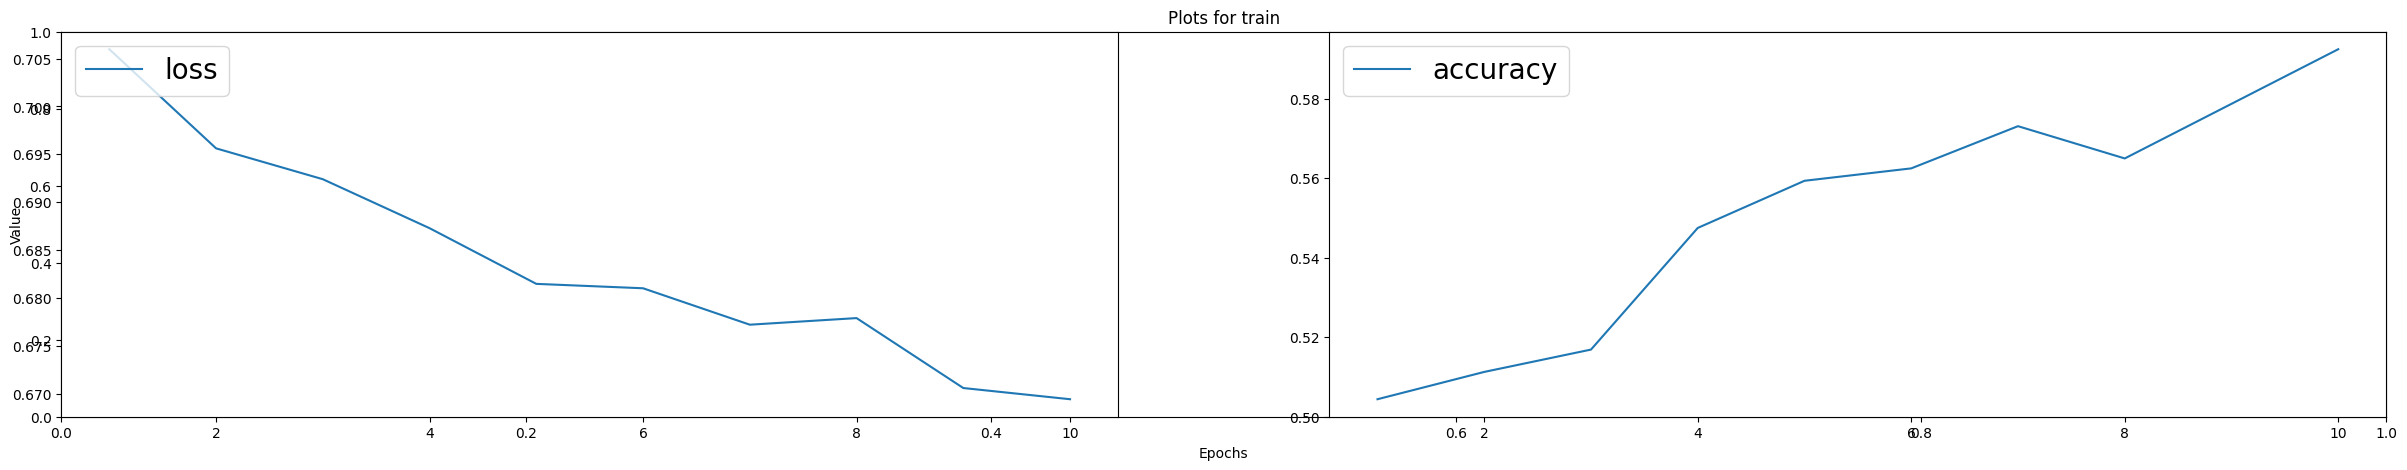

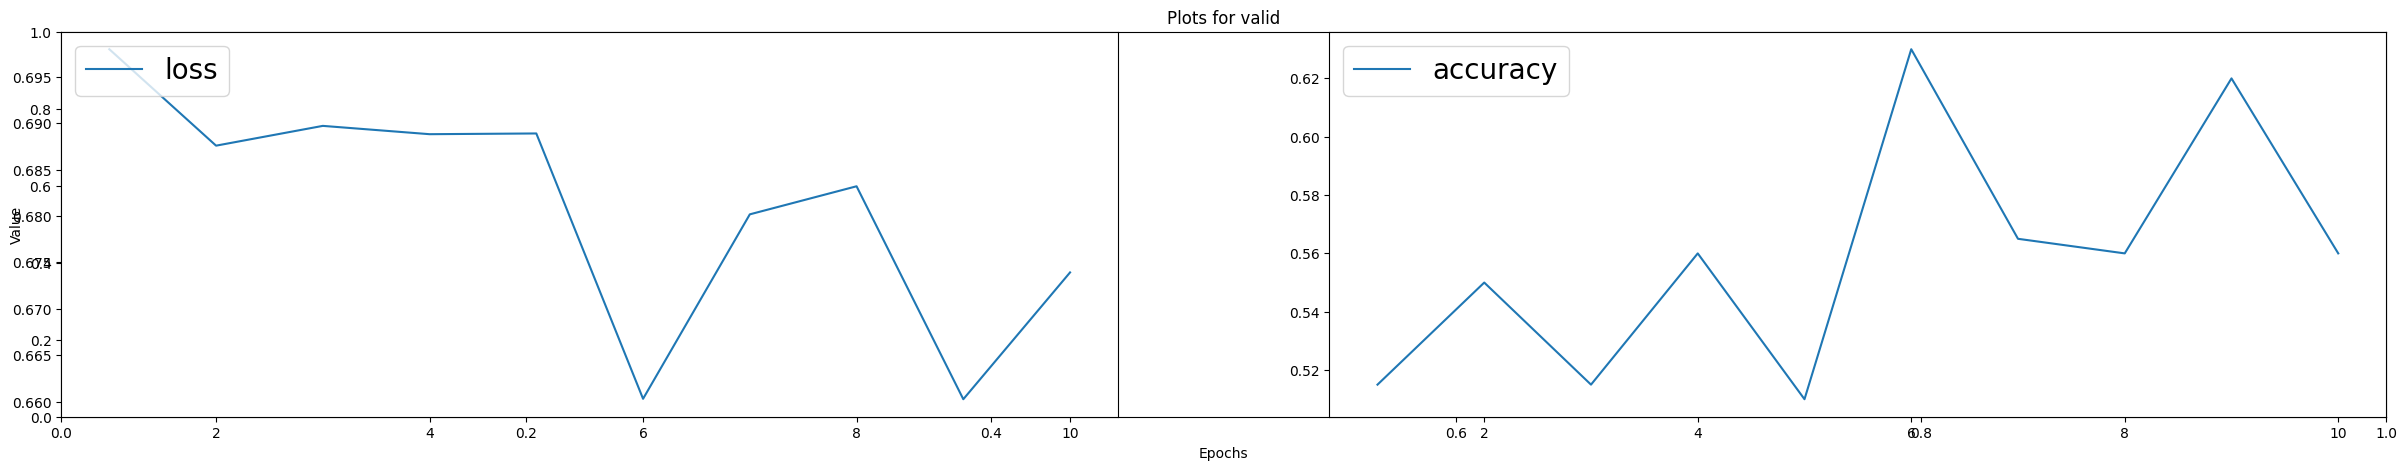

In [20]:
epochs = 10

def train_loop (model, train_loader, val_loader, epochs, optimizer, criterion, saving_path):
    val_loss_list = []
    val_accuracy_list = []

    loss_list = []
    accuracy_list = []

    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0

        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)

            output = model(data)
            loss = criterion(output, label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)

        loss_list.append(epoch_loss.item())
        accuracy_list.append(epoch_accuracy.item())

        print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))


        with torch.no_grad():
            epoch_val_accuracy=0
            epoch_val_loss =0

            for data, label in val_loader:
                data = data.to(device)
                label = label.to(device)

                val_output = model(data)
                val_loss = criterion(val_output,label)

                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader)
                epoch_val_loss += val_loss/ len(val_loader)


            val_loss_list.append(epoch_val_loss.item())
            val_accuracy_list.append(epoch_val_accuracy.item())

            print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))


    num_epochs = [i+1 for i in range(epochs)]

    fig = plt.figure(figsize=(30, 5))
    plt.title('Plots for train')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    fig.add_subplot(1,2,1)
    plt.plot(num_epochs, loss_list, label = 'loss')
    plt.legend(loc=2, prop={'size': 20})
    fig.add_subplot(1,2,2)
    plt.plot(num_epochs, accuracy_list, label = 'accuracy')
    plt.legend(loc=2, prop={'size': 20})

    fig = plt.figure(figsize=(30, 5))
    plt.title('Plots for valid')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    fig.add_subplot(1,2,1)
    plt.plot(num_epochs, val_loss_list, label = 'loss')
    plt.legend(loc=2, prop={'size': 20})
    fig.add_subplot(1,2,2)
    plt.plot(num_epochs, val_accuracy_list, label = 'accuracy')
    plt.legend(loc=2, prop={'size': 20})
    plt.show()

    torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss_list': loss_list,
            'accuracy_list': accuracy_list,
            'val_loss_list': val_loss_list,
            'val_accuracy_list': val_accuracy_list,
        }, saving_path)


for batch_size in [10, 25, 50]:

    train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True)

    val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=True)

    for lr in [0.001, 0.0001, 0.00001]:
        print(f'Learning rate: {lr}, Batch size: {batch_size}')

        model = ConvNet().to(device)
        model.train()

        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()


        train_loop(model, train_loader, val_loader, epochs, optimizer, criterion, f"model_{batch_size}_{lr}.pth")
        print()
        print()

Tasks 7-8.
The work of the model

In [50]:
for batch_size in [10, 25, 50]:
    test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=1, shuffle=False)
    for lr in [0.001, 0.0001, 0.00001]:
        print(f"Batch size: {batch_size}, lr: {lr}")

        model = ConvNet().to(device)
        checkpoint = torch.load(f"model_{batch_size}_{lr}.pth", map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()
        correct = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                preds = model(images)
                preds_list = F.softmax(preds, dim=1)[:, 1].tolist()[0]
                if preds_list > 0.5:
                    label = 1
                else:
                    label = 0
                if labels.item() == label:
                    correct += 1
        print(f"Correct detection: {(correct / len(test_loader)) * 100}%\n")


Batch size: 10, lr: 0.001
Correct detection: 72.5%

Batch size: 10, lr: 0.0001
Correct detection: 67.0%

Batch size: 10, lr: 1e-05
Correct detection: 64.5%

Batch size: 25, lr: 0.001
Correct detection: 68.0%

Batch size: 25, lr: 0.0001
Correct detection: 70.0%

Batch size: 25, lr: 1e-05
Correct detection: 59.5%

Batch size: 50, lr: 0.001
Correct detection: 74.0%

Batch size: 50, lr: 0.0001
Correct detection: 65.5%

Batch size: 50, lr: 1e-05
Correct detection: 62.0%



Вывод: лучший результат (74%) у модели с параметрами Batch size: 50, lr: 0.001

dog


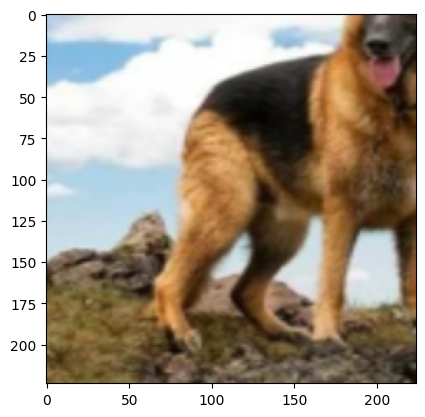

dog


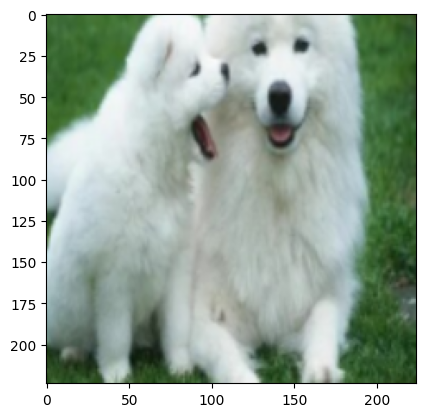

dog


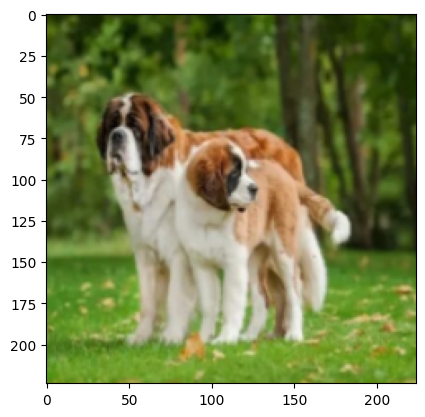

cat


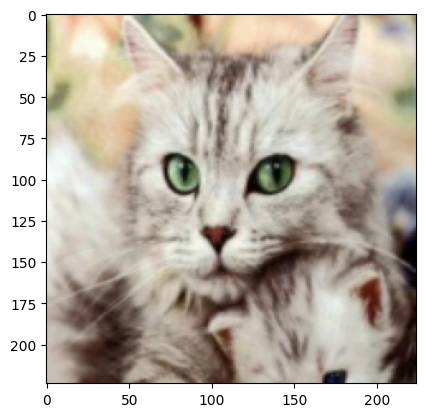

dog


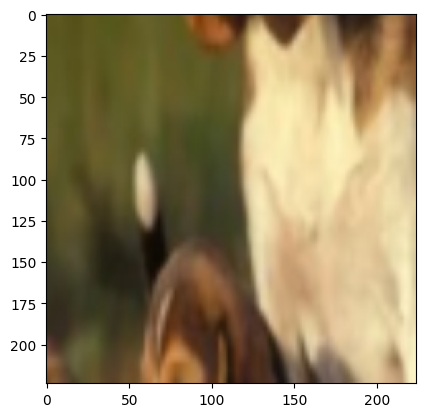

cat


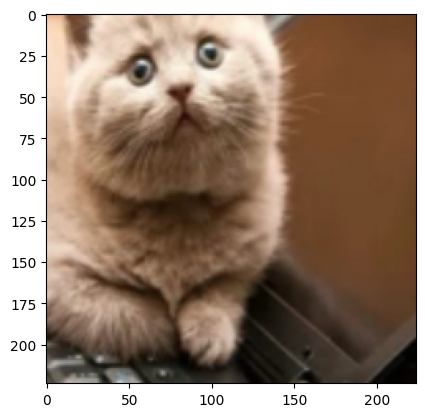

In [59]:
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=1, shuffle=True)
model = ConvNet().to(device)
checkpoint = torch.load(f"model_{50}_{0.001}.pth", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

with torch.no_grad():
    i = 0
    for images, labels in test_loader:
        images = images.to(device)
        preds = model(images)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()[0]
        if preds_list > 0.5:
            label = "dog"
        else:
            label = "cat"
        print(label)
        img = images[0].cpu().detach().numpy()
        img = np.swapaxes(img, 0, 2)
        img = np.swapaxes(img, 0, 1)
        plt.imshow(img)
        plt.show()
        i+=1
        if i > 5:
            break